# Association Rules - 360DIGITMG

1. Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. ... In contrast with sequence mining, association rule learning typically does not consider the order of items either within a transaction or across transactions.

2. Apriori is part of the association rule learning algorithms, which sit under the unsupervised branch of Machine Learning.Apriori does not require us to provide a target variable for the model. Instead, the algorithm identifies relationships between data points subject to our specified constraints.

1. Support
The first step for us and the algorithm is to find frequently bought items. It is a straightforward calculation that is based on frequency.
Support(A) = Transactions(A) / Total Transactions

2. Confidence
Now that we have identified frequently bought items let’s calculate confidence. This will tell us how confident (based on our data) we can be that an item will be purchased, given that another item has been purchased.
Confidence(A→B) = Probability(A & B) / Support(A)

3. Lift
Given that different items are bought at different frequencies, how do we know that eggs and bacon really do have a strong association, and how do we measure it? You will be glad to hear that we have a way to evaluate this objectively using lift.
There are multiple ways to express the formula to calculate lift.
1) Lift(A→B) = Probability(A & B) / (Support(A) * Support(B))
2) Lift(A→B) = Confidence(A & B) / Support(B)

# Steps Involved in Apriori Algorithm
1. Set a minimum value for support and confidence. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).
2. Extract all the subsets having higher value of support than minimum threshold.
3. Select all the rules from the subsets with confidence value higher than minimum threshold.
4. Order the rules by descending order of Lift.

# Association Rules Problem No. 1
Kitabi Duniya, a famous book store in India, which was established before Independence, the growth of the company was incremental year by year, but due to online selling of books and wide spread Internet access its annual growth started to collapse, seeing sharp downfalls, you as a Data Scientist help this heritage book store gain its popularity back and increase footfall of customers and provide ways the bus iness can improve exponentially, apply Association RuleAlgorithm, explain the rules, and visualize the graphs for clear understanding of solution.

# Business Objective :
To capture the different set of rule values for Books Dataset using apriori algorithm.Also Observe the change in number of rules for different support,confidence values

In [10]:
import pandas as pd # for Data Manipulation
from mlxtend.frequent_patterns import apriori, association_rules # for Apriori algorithm we use mlxtend 
import matplotlib.pyplot as plt # Data Vizualization

In [11]:
#loading the book data set
book = pd.read_csv("book.csv")


In [12]:
#describe the book dataset it shows 8 statistic parameters
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Applying apriori algorithem for model with min support
book_x = apriori(book, min_support = 0.0075, max_len = 4, use_colnames = True)
book_x

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
461,0.0090,"(GeogBks, Florence, ItalArt, ArtBks)"
462,0.0125,"(ItalCook, ItalAtlas, ItalArt, ArtBks)"
463,0.0095,"(ItalCook, Florence, ItalArt, ArtBks)"
464,0.0090,"(GeogBks, ItalAtlas, ItalArt, ItalCook)"


In [14]:
# Checking the Most Frequent item sets based on support 
book_x.sort_values('support', ascending = False, inplace = True)

<ipython-input-15-580a28e06ce5>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 10)), height = book_x.support[0:10], color ='rgmyk')


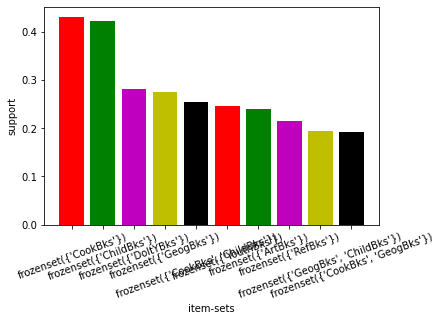

In [15]:
# now we ploting the bar plot for checking the support  with item sets 
plt.bar(x = list(range(0, 10)), height = book_x.support[0:10], color ='rgmyk')
plt.xticks(list(range(0, 10)), book_x.itemsets[0:10], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [16]:
# If we are interested in rules according to a different metric of interest, we can simply adjust the metric 
# and min_threshold arguments .
# Eg.  if you are only interested in rules that have a lift score of >= 1, you would do the following:
rules = association_rules(book_x, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10) # arranging the lift in desending order

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2141,"(RefBks, ItalArt)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.01614,5.611429
2144,"(ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.01614,11.760000
3341,"(GeogBks, ItalAtlas)","(RefBks, ItalArt)",0.0205,0.0200,0.0115,0.560976,28.048780,0.01109,2.232222
3340,"(RefBks, ItalArt)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.01109,2.304706
3150,"(ItalAtlas, ItalCook)","(RefBks, ItalArt)",0.0230,0.0200,0.0125,0.543478,27.173913,0.01204,2.146667
3147,"(RefBks, ItalArt)","(ItalAtlas, ItalCook)",0.0200,0.0230,0.0125,0.625000,27.173913,0.01204,2.605333
2608,"(ItalAtlas, ChildBks)","(RefBks, ItalArt)",0.0285,0.0200,0.0145,0.508772,25.438596,0.01393,1.995000
2605,"(RefBks, ItalArt)","(ItalAtlas, ChildBks)",0.0200,0.0285,0.0145,0.725000,25.438596,0.01393,3.532727
3883,"(RefBks, ItalArt)","(ItalAtlas, DoItYBks)",0.0200,0.0190,0.0095,0.475000,25.000000,0.00912,1.868571
3886,"(ItalAtlas, DoItYBks)","(RefBks, ItalArt)",0.0190,0.0200,0.0095,0.500000,25.000000,0.00912,1.960000


In [17]:
################################# Extra part ###################################
# arranging the list using function
def to_list(i):
    return (sorted(list(i)))

In [19]:
# adding the antecedents and consequents  rules
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X

0                          [ChildBks, CookBks]
1                          [CookBks, ChildBks]
2                          [ChildBks, GeogBks]
3                          [GeogBks, ChildBks]
4                           [CookBks, GeogBks]
                         ...                  
4481    [GeogBks, ItalArt, Florence, ItalCook]
4482    [Florence, GeogBks, ItalArt, ItalCook]
4483    [ItalCook, Florence, GeogBks, ItalArt]
4484    [ItalArt, Florence, GeogBks, ItalCook]
4485    [GeogBks, Florence, ItalArt, ItalCook]
Length: 4486, dtype: object

In [20]:
ma_X = ma_X.apply(sorted)
ma_X

0                          [ChildBks, CookBks]
1                          [ChildBks, CookBks]
2                          [ChildBks, GeogBks]
3                          [ChildBks, GeogBks]
4                           [CookBks, GeogBks]
                         ...                  
4481    [Florence, GeogBks, ItalArt, ItalCook]
4482    [Florence, GeogBks, ItalArt, ItalCook]
4483    [Florence, GeogBks, ItalArt, ItalCook]
4484    [Florence, GeogBks, ItalArt, ItalCook]
4485    [Florence, GeogBks, ItalArt, ItalCook]
Length: 4486, dtype: object

In [21]:
rules_sets = list(ma_X)
rules_sets

[['ChildBks', 'CookBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'GeogBks'],
 ['ChildBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ArtBks', 'CookBks'],
 ['ArtBks', 'CookBks'],
 ['ChildBks', 'YouthBks'],
 ['ChildBks', 'YouthBks'],
 ['ArtBks', 'ChildBks'],
 ['ArtBks', 'ChildBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', '

In [22]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
unique_rules_sets

[['ChildBks', 'CookBks', 'RefBks', 'YouthBks'],
 ['ArtBks', 'ChildBks', 'Florence', 'ItalCook'],
 ['ArtBks', 'ChildBks', 'GeogBks', 'ItalCook'],
 ['ArtBks', 'CookBks', 'Florence', 'GeogBks'],
 ['GeogBks', 'ItalArt', 'ItalAtlas', 'RefBks'],
 ['ChildBks', 'CookBks', 'DoItYBks', 'Florence'],
 ['ArtBks', 'ChildBks', 'CookBks', 'Florence'],
 ['CookBks', 'GeogBks', 'RefBks', 'YouthBks'],
 ['ChildBks', 'ItalAtlas', 'RefBks', 'YouthBks'],
 ['ChildBks', 'ItalArt', 'ItalAtlas', 'RefBks'],
 ['GeogBks', 'ItalArt', 'ItalCook', 'YouthBks'],
 ['ArtBks', 'Florence', 'GeogBks'],
 ['ArtBks', 'DoItYBks', 'ItalArt', 'YouthBks'],
 ['ArtBks', 'ChildBks', 'CookBks', 'ItalCook'],
 ['CookBks', 'DoItYBks', 'ItalArt', 'ItalAtlas'],
 ['CookBks', 'Florence', 'RefBks'],
 ['ChildBks', 'ItalArt', 'ItalCook', 'YouthBks'],
 ['ItalAtlas', 'ItalCook'],
 ['ItalArt', 'ItalCook', 'RefBks', 'YouthBks'],
 ['ChildBks', 'YouthBks'],
 ['Florence', 'GeogBks', 'RefBks', 'YouthBks'],
 ['ArtBks', 'CookBks', 'GeogBks', 'YouthBks'],
 

In [24]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [26]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
312,"(ChildBks, CookBks, YouthBks)",(RefBks),0.1290,0.2145,0.0680,0.527132,2.457491,0.040330,1.661139
3644,"(Florence, ChildBks, ItalCook)",(ArtBks),0.0140,0.2410,0.0100,0.714286,2.963841,0.006626,2.656500
1130,"(ArtBks, ChildBks, ItalCook)",(GeogBks),0.0455,0.2760,0.0300,0.659341,2.388915,0.017442,2.125290
1596,"(Florence, CookBks, GeogBks)",(ArtBks),0.0310,0.2410,0.0230,0.741935,3.078570,0.015529,2.941125
3334,"(ItalAtlas, ItalArt, RefBks)",(GeogBks),0.0165,0.2760,0.0115,0.696970,2.525253,0.006946,2.389200
...,...,...,...,...,...,...,...,...,...
2272,"(Florence, ChildBks, RefBks)",(GeogBks),0.0215,0.2760,0.0160,0.744186,2.696326,0.010066,2.830182
798,"(ChildBks, ItalCook, CookBks)",(RefBks),0.0850,0.2145,0.0415,0.488235,2.276155,0.023267,1.534885
932,"(ItalCook, YouthBks)",(GeogBks),0.0590,0.2760,0.0345,0.584746,2.118644,0.018216,1.743510
2820,"(ItalArt, RefBks)",(GeogBks),0.0200,0.2760,0.0135,0.675000,2.445652,0.007980,2.227692


In [27]:
# Sorting them with respect to list and getting top 10 rules 
add = rules_no_redudancy.sort_values('lift', ascending = False).head(10)
add

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
854,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
3116,"(ItalAtlas, ItalCook)",(ItalArt),0.0230,0.0485,0.0125,0.543478,11.205737,0.011385,2.084238
3872,"(Florence, ItalCook)",(ItalArt),0.0175,0.0485,0.0095,0.542857,11.192931,0.008651,2.081406
2560,"(ItalAtlas, ChildBks)",(ItalArt),0.0285,0.0485,0.0145,0.508772,10.490143,0.013118,1.936982
2188,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
1222,"(ChildBks, ItalArt, CookBks)",(ItalCook),0.0300,0.1135,0.0285,0.950000,8.370044,0.025095,17.730000
1794,"(ItalAtlas, ChildBks, CookBks)",(ItalCook),0.0225,0.1135,0.0200,0.888889,7.831620,0.017446,7.978500
1250,"(ChildBks, ItalArt)",(ItalCook),0.0360,0.1135,0.0285,0.791667,6.975037,0.024414,4.255200
1198,"(ArtBks, ChildBks, ItalArt)",(ItalCook),0.0360,0.1135,0.0285,0.791667,6.975037,0.024414,4.255200
880,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990


# Result : 
At final result we  geting the Support Confidence and lift of all the items that helps to find the Association rule mining algorithms such as Apriori are very useful for finding simple associations between our data items

In [28]:
# just save the file into .csv file
rules_no_redudancy.to_csv("bookArules.csv",encoding="utf 8")

import os
os.getcwd()

'C:\\Users\\pawar'

In [ ]:
## Warning: plot: Too many rules supplied. Only plotting the best 100 rules
## using 'support' (change control parameter max if needed)